In [103]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [104]:
df=pd.read_csv("C:/Users/91868/Downloads/diabetes.csv")

In [105]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']

In [107]:
X = StandardScaler().fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [110]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [111]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [112]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

In [113]:
knn=KNeighborsClassifier()

In [114]:
knn.fit(X_train,y_train)

In [116]:
#c Testing the model

In [121]:
y_pred=knn.predict(X_test)

In [119]:
#accuracy and confusion Matrix.

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [137]:
confusion_matrix(y_pred,y_test)

array([[85, 16],
       [14, 39]], dtype=int64)

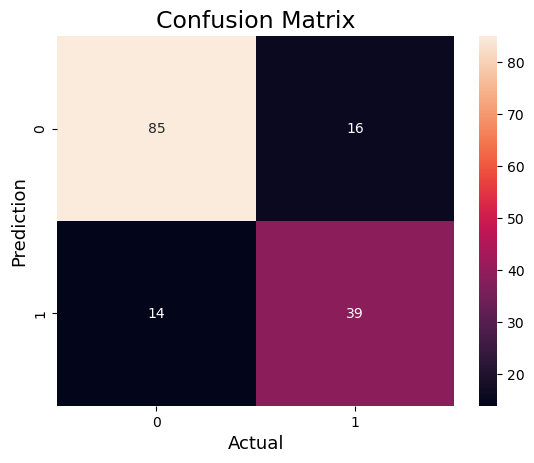

In [138]:
sns.heatmap(cm, 
            annot=True,
            fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()